In [363]:
import numpy as np
import seaborn as sn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, confusion_matrix
import matplotlib.pyplot as plt
import time

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = False)

In [11]:
x_train,  x_test,  y_train,  y_test  =  train_test_split(mnist.data, mnist.target, train_size=0.7)    

In [3]:
indices = np.random.randint(70000,size=5000)
mnist_5000_data = mnist.data[indices]
mnist_5000_target = mnist.target[indices]

In [266]:
x_train, x_test, y_train, y_test = train_test_split(mnist_5000_data, mnist_5000_target, train_size=0.8)

In [268]:
nn = MLPClassifier(hidden_layer_sizes=(50))

nn.fit(x_train, y_train)

print(nn.score(x_test, y_test) * 100)

84.8


In [269]:
print(mnist.target[6542])

nn.predict(mnist.data[6542].reshape(1, -1))

9


array(['9'], dtype='<U1')

In [ ]:
y_pred = nn.predict(x_test)
print(y_pred)
print(y_test)

precision_score(y_test, y_pred, average='micro')

In [271]:
y = []
x = []
train_times = []
for n in range(1, 100, 4):
    hidden_layer_sizes = (50,) * n
    nn = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes)
    start_time = time.time()
    nn.fit(x_train, y_train)
    stop_time = time.time()
    
    y_pred = nn.predict(x_test)
    y.append(precision_score(y_test, y_pred, average='micro') * 100)
    x.append(n)
    train_times.append(stop_time - start_time)

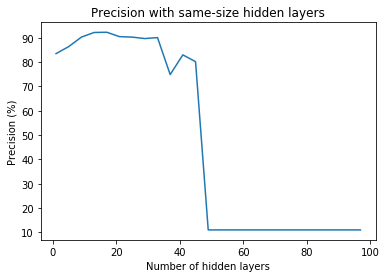

In [272]:
plt.plot(x, y)
plt.title("Precision with same-size hidden layers")
plt.ylabel("Precision (%)")
plt.xlabel("Number of hidden layers")
plt.savefig('ex1.1.png', dpi=300)

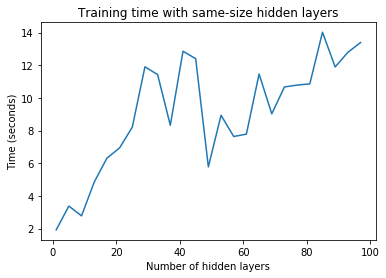

In [273]:
plt.plot(x, train_times)
plt.title("Training time with same-size hidden layers")
plt.ylabel("Time (seconds)")
plt.xlabel("Number of hidden layers")
plt.savefig('ex1.2.png', dpi=300)

In [298]:
n_hidden_layers = [2, 4, 6, 8, 10]
tuple(np.random.randint(10, 300, 4))

x = []
y = []
nn_models = []
train_times = []
for n in n_hidden_layers:
    tup = tuple(np.random.randint(10, 300, n))
    nn = MLPClassifier(hidden_layer_sizes=tup)
    start_time = time.time()
    nn.fit(x_train, y_train)
    stop_time = time.time()
    
    y_pred = nn.predict(x_test)
    y.append(precision_score(y_test, y_pred, average='micro') * 100)
    x.append(n)
    nn_models.append(nn)
    train_times.append(stop_time - start_time)

Layer topology: (139, 58)
Average layer size: 98
Training time: 2.35 seconds.

Layer topology: (92, 75, 79, 279)
Average layer size: 131
Training time: 4.29 seconds.

Layer topology: (236, 297, 171, 157, 38, 231)
Average layer size: 188
Training time: 6.71 seconds.

Layer topology: (237, 63, 77, 105, 77, 223, 23, 288)
Average layer size: 136
Training time: 10.52 seconds.

Layer topology: (74, 140, 272, 257, 110, 123, 287, 184, 65, 227)
Average layer size: 173
Training time: 10.63 seconds.



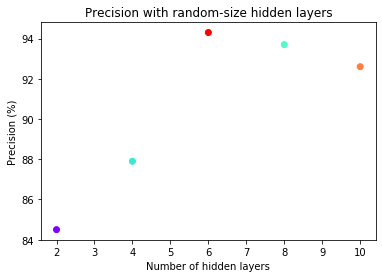

In [300]:
plt.scatter(x, y, c=[sum(model.hidden_layer_sizes)//len(model.hidden_layer_sizes) for model in nn_models], cmap='rainbow')
plt.title("Precision with random-size hidden layers")
plt.ylabel("Precision (%)")
plt.xlabel("Number of hidden layers")
plt.savefig('ex2.1.png', dpi=300)

for model, time_ in zip(nn_models, train_times):
    print(f"Layer topology: {model.hidden_layer_sizes}")
    print(f"Average layer size: {sum(model.hidden_layer_sizes)//len(model.hidden_layer_sizes)}")
    print(f"Training time: {round(time_,2)} seconds.\n")

In [319]:
# Choice of solver
x = []
y = []
train_times = []
tup = tuple(np.random.randint(170, 190, 8))
solvers = ['lbfgs', 'sgd', 'adam']

for solver in solvers:
    nn = MLPClassifier(hidden_layer_sizes=tup, solver=solver)
    start_time = time.time()
    nn.fit(x_train, y_train)
    stop_time = time.time()
    
    y_pred = nn.predict(x_test)
    y.append(precision_score(y_test, y_pred, average='micro') * 100)
    x.append(solver)
    train_times.append(stop_time - start_time)

solver lbfgs took 11.02 seconds to train
solver sgd took 12.15 seconds to train
solver adam took 5.81 seconds to train


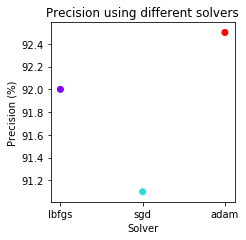

In [327]:
plt.figure(figsize=[3.3, 3.3])
plt.scatter(solvers, y, c=[1,3,7], cmap='rainbow')
plt.title("Precision using different solvers")
plt.ylabel("Precision (%)")
plt.xlabel("Solver")
plt.savefig('ex3.3.png', dpi=300)


for solver, time_ in zip(solvers, train_times):
    print("solver", solver, "took", "%.2f"%time_, "seconds to train")

In [328]:
# Choice of activation
x = []
y = []
train_times = []
tup = tuple(np.random.randint(170, 190, 8))
activations = ['identity', 'logistic', 'tanh', 'relu']

for activation in activations:
    nn = MLPClassifier(hidden_layer_sizes=tup, solver='adam', activation=activation)
    start_time = time.time()
    nn.fit(x_train, y_train)
    stop_time = time.time()
    
    y_pred = nn.predict(x_test)
    y.append(precision_score(y_test, y_pred, average='micro') * 100)
    x.append(activation)
    train_times.append(stop_time - start_time)

NN hidden layer topology: (179, 162, 167, 165, 170, 172, 169, 177)
activation fn identity took 8.88 seconds to train
activation fn logistic took 35.96 seconds to train
activation fn tanh took 12.16 seconds to train
activation fn relu took 6.88 seconds to train


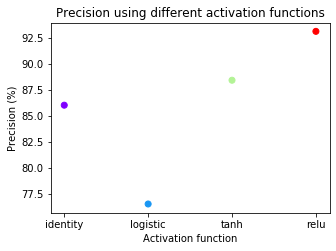

In [332]:
plt.figure(figsize=[5, 3.5])
plt.scatter(activations, y, c=[1,3,7, 11], cmap='rainbow')
plt.title("Precision using different activation functions")
plt.ylabel("Precision (%)")
plt.xlabel("Activation function")
plt.savefig('ex4.1.png', dpi=300)

print("NN hidden layer topology:", tup)

for activation, time_ in zip(activations, train_times):
    print("activation fn", activation, "took", "%.2f"%time_, "seconds to train")

In [352]:
# Choice of alpha ("adam" solver)
x = []
y = []
train_times = []
tup = tuple(np.random.randint(170, 190, 8))
#alphas = [0.0001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 12]
alphas = [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]
for alpha in alphas:
    nn = MLPClassifier(hidden_layer_sizes=tup)
    start_time = time.time()
    nn.fit(x_train, y_train)
    stop_time = time.time()
    
    y_pred = nn.predict(x_test)
    
    y.append(precision_score(y_test, y_pred, average='micro') * 100)
    x.append(alpha)
    train_times.append(stop_time - start_time)

NN hidden layer topology: (179, 179, 179, 179, 179, 179, 179, 179)
alpha: 0.5 took 5.56 seconds to train
alpha: 0.75 took 11.72 seconds to train
alpha: 1 took 6.72 seconds to train
alpha: 1.25 took 8.09 seconds to train
alpha: 1.5 took 7.10 seconds to train
alpha: 1.75 took 7.97 seconds to train
alpha: 2 took 5.75 seconds to train
alpha: 2.25 took 12.65 seconds to train
alpha: 2.5 took 6.88 seconds to train


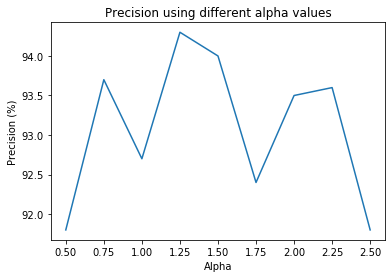

In [353]:
plt.plot(alphas, y)
plt.title("Precision using different alpha values")
plt.ylabel("Precision (%)")
plt.xlabel("Alpha")
plt.savefig('ex5.1.png', dpi=300)

print("NN hidden layer topology:", tup)

for alpha, time_ in zip(alphas, train_times):
    print("alpha:", alpha, "took", "%.2f"%time_, "seconds to train")

In [361]:
# Da bess
tup = tuple(np.random.randint(170, 190, 8))

nn = MLPClassifier(hidden_layer_sizes=tup, alpha=1.5)
nn.fit(x_train, y_train)

y_pred = nn.predict(x_test)
print(precision_score(y_test, y_pred, average='micro') * 100)

94.69999999999999


In [362]:
confusion_matrix(y_test, y_pred)

array([[ 92,   0,   1,   0,   0,   1,   0,   0,   1,   0],
       [  0, 108,   1,   0,   0,   0,   0,   0,   0,   1],
       [  1,   0,  92,   0,   0,   0,   1,   0,   4,   0],
       [  0,   2,   4,  90,   0,   2,   0,   0,   0,   0],
       [  0,   0,   0,   0,  92,   0,   0,   0,   0,   2],
       [  0,   2,   0,   1,   2,  79,   1,   0,   1,   4],
       [  3,   1,   0,   0,   0,   1, 104,   0,   0,   0],
       [  0,   0,   1,   0,   3,   0,   0,  99,   0,   1],
       [  0,   2,   0,   1,   0,   1,   0,   1,  97,   4],
       [  0,   0,   0,   0,   2,   0,   0,   0,   0,  94]])

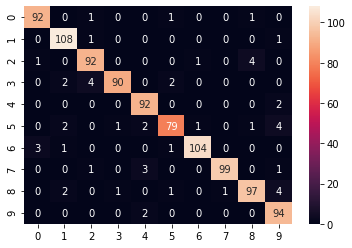

In [364]:
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

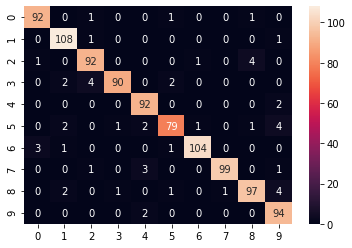

In [366]:
f, ax = plt.subplots()
ax = sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
f.savefig('ex6.1.png', dpi=300)